In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.load('/content/gdrive/My Drive/Junction Classify/junc data' + str(self.n_classes) +  '/fit/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)
    

class EvalDataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.load('/content/gdrive/My Drive/Junction Classify/junc data' + str(self.n_classes) +  '/eval/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]
        

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)


**2 CLASS**


---



---

In [ ]:
import numpy as np
from keras.models import Sequential
import json
from keras.utils import to_categorical

with open('/content/gdrive/My Drive/Junction Classify/junc data2/labels_fit.json', 'r') as fp:
    labels_fit = json.load(fp)
with open('/content/gdrive/My Drive/Junction Classify/junc data2/partition_fit.json', 'r') as fp:
    partition_fit = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data2/labels_eval.json', 'r') as fp:
    labels_eval = json.load(fp)
with open('/content/gdrive/My Drive/Junction Classify/junc data2/partition_eval.json', 'r') as fp:
    partition_eval = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data2/IDInfo_fit.json', 'r') as fp:
    IDInfo_fit = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data2/IDInfo_eval.json', 'r') as fp:
    IDInfo_eval = json.load(fp)

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display
%matplotlib inline


y_eval = []

x_eval = np.empty((len(labels_eval), 5, 128, 128, 3))
count = 0
for key in labels_eval:
  y_eval.append(labels_eval[key])
  x_eval[count,] = np.load('/content/gdrive/My Drive/Junction Classify/junc data2/eval/' + key + '.npy')
  count += 1

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 

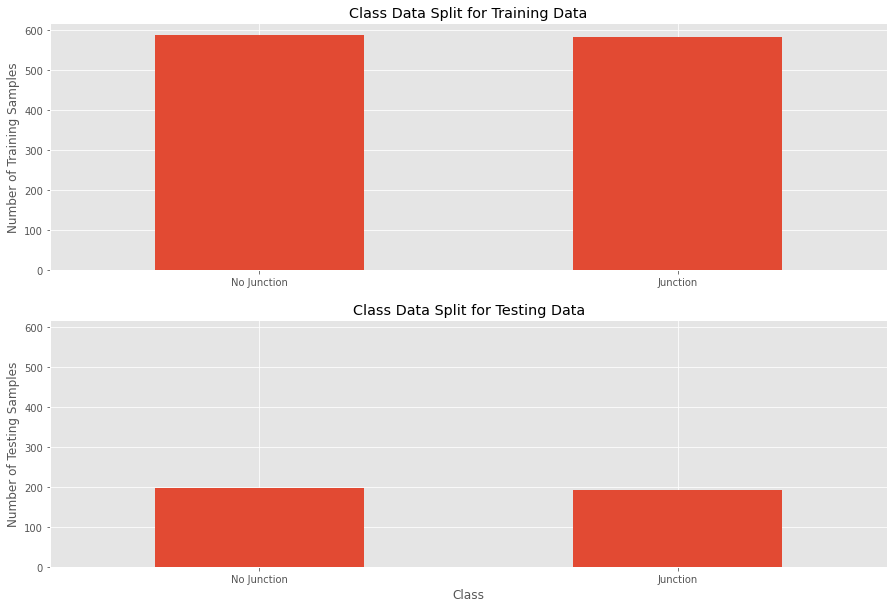

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

labelList = []
for key in labels_fit:
  labelList.append(labels_fit[key])
print(labelList)

print(len(labelList))

labelList2 = []
for key in labels_eval:
  labelList2.append(labels_eval[key])
print(labelList2)

print(len(labelList2))


df1 = pd.DataFrame({'freq': labelList})

df2 = pd.DataFrame({'freq': labelList2})

width2 = 15
height2 = 10
width_height_2 = (width2, height2)

with plt.style.context('ggplot'):

  f, (ax1, ax2) = plt.subplots(2, 1, sharey = True)
  f.set_figheight(height2)
  f.set_figwidth(width2)

  df1.groupby('freq', as_index=True).size().plot(kind = 'bar', ax = ax1)
  ax1.set_ylabel('Number of Training Samples')
  ax1.set_xlabel('')
  ax1.set_title('Class Data Split for Training Data')
  ax1.set_xticklabels(('No Junction', 'Junction'), rotation='horizontal')


  df2.groupby('freq', as_index=True).size().plot(kind='bar', ax = ax2)
  ax2.set_ylabel('Number of Testing Samples')
  ax2.set_xlabel('Class')
  ax2.set_title('Class Data Split for Testing Data')
  ax2.set_xticklabels(('No Junction', 'Junction'), rotation='horizontal')

  plt.savefig(str("/content/gdrive/My Drive/Junction Classify/Plots/2classSplit.png"))

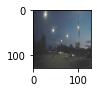

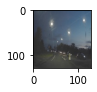

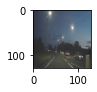

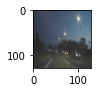

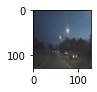

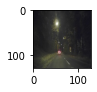

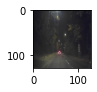

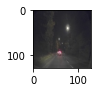

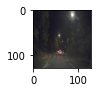

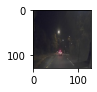

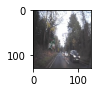

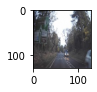

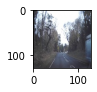

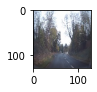

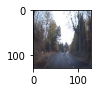

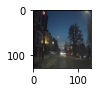

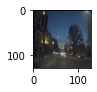

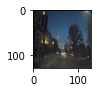

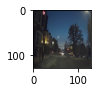

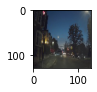

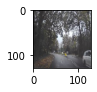

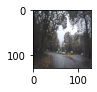

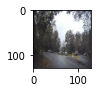

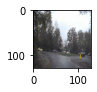

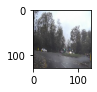

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization, Embedding, AveragePooling3D, ConvLSTM2D
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

# Parameters
params = {'dim': (5, 128, 128),
      'batch_size': 5,
      'n_classes': 2,
      'n_channels': 3,
      'shuffle': True}

# Generators
training_generator = DataGenerator(partition_fit['train'], labels_fit, **params)
validation_generator = DataGenerator(partition_fit['validation'], labels_fit, **params)
evaluation_generator = EvalDataGenerator(partition_eval['evaluate'], labels_eval, **params)

for i in validation_generator.__getitem__(4)[0]:
    for j in range(1, len(i)+1):
      plt.subplot(1,5,j)
      plt.imshow(i[j-1])
      plt.show()


In [ ]:
input_shape = (5, 128, 128, 3)
num_classes = 2
model = Sequential()
model.add(Conv3D(4, kernel_size=(2, 3, 3), activation='relu', input_shape=input_shape)) # input shape only here
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # dropout = 0.25 is OK to start with
model.add(Conv3D(8, kernel_size=(1, 3, 3), activation='relu')) # kernel_size = (1, 3, 3)
model.add(MaxPooling3D(pool_size=(1, 2, 2))) # subsamples in x and y which will reduce parameters considerably at each layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv3D(8, kernel_size=(1, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu')) # start with a small hidden layer
model.add(Dense(num_classes, activation='softmax'))

model.summary() # check the numbers of parameters at each layers

my_lr = 1e-4

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.binary_accuracy])


# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=False,
                    workers=6,
                    epochs = 50)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 4, 63, 63, 4)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 63, 63, 4)      16        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 4, 30, 30, 8)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 30, 30, 8)     

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

crossEnt, acc_long= model.evaluate_generator(generator=evaluation_generator)

acc = round(acc_long, 2)

print(crossEnt)
print(acc)

y_pred = np.argmax(model.predict(x_eval), axis=-1)
print(classification_report(y_eval, y_pred))

0.671935498714447
0.69
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       196
           1       0.65      0.77      0.70       191

    accuracy                           0.68       387
   macro avg       0.69      0.68      0.68       387
weighted avg       0.69      0.68      0.68       387



In [ ]:
numClass = '2'
date = '17_8'
ver = '01'

dir = str("/content/gdrive/My Drive/Junction Classify/Models/"+ numClass +"class/"+ numClass +"class_"+ date +"_(" + ver + ")_"+ str(acc))

Saved model to disk


In [ ]:
# serialize model to JSON
model_2class_json = model.to_json()
with open(str(dir + '.json'), "w") as json_file:
    json_file.write(model_2class_json)
# serialize weights to HDF5
model.save_weights(str(dir + ".h5"))
print("Saved model to disk")

In [ ]:
from sklearn.metrics import classification_report
dir = "/content/gdrive/My Drive/Junction Classify/Models/2class/2class_17_8_(01)_0.69"

my_lr = 1e-4

# load json and create model
json_file = open(str(dir + '.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(str(dir + ".h5"))
print("Loaded model from disk")

loaded_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.binary_accuracy])
y_pred = np.argmax(loaded_model.predict(x_eval), axis=-1)
print(y_pred)
print(classification_report(y_eval, y_pred))

Loaded model from disk
[0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0]
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       196
           1       0.65      0.77      0.70       191

    accuracy               

In [ ]:
crossEnt, acc_long= loaded_model.evaluate_generator(generator=evaluation_generator)

acc = round(acc_long, 2)

print(crossEnt)
print(acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
0.671935498714447
0.69


In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 4, 63, 63, 4)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 63, 63, 4)      16        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 4, 30, 30, 8)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 30, 30, 8)     

**4 CLASS**


---



---

In [ ]:
import numpy as np
from keras.models import Sequential
import json
from keras.utils import to_categorical

with open('/content/gdrive/My Drive/Junction Classify/junc data4/labels_fit_4class.json', 'r') as fp:
    labels_fit_4class = json.load(fp)
with open('/content/gdrive/My Drive/Junction Classify/junc data4/partition_fit_4class.json', 'r') as fp:
    partition_fit_4class = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data4/labels_eval_4class.json', 'r') as fp:
    labels_eval_4class = json.load(fp)
with open('/content/gdrive/My Drive/Junction Classify/junc data4/partition_eval_4class.json', 'r') as fp:
    partition_eval_4class = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data4/IDInfo_fit_4class.json', 'r') as fp:
    IDInfo_fit_4class = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data4/IDInfo_eval_4class.json', 'r') as fp:
    IDInfo_eval_4class = json.load(fp)

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display
%matplotlib inline


y_eval_4class = []

x_eval_4class = np.empty((len(labels_eval_4class), 5, 128, 128, 3))
count = 0
for key in labels_eval_4class:
  y_eval_4class.append(labels_eval_4class[key])
  x_eval_4class[count,] = np.load('/content/gdrive/My Drive/Junction Classify/junc data4/eval/' + key + '.npy')
  count += 1

# print(x_eval_4class)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 

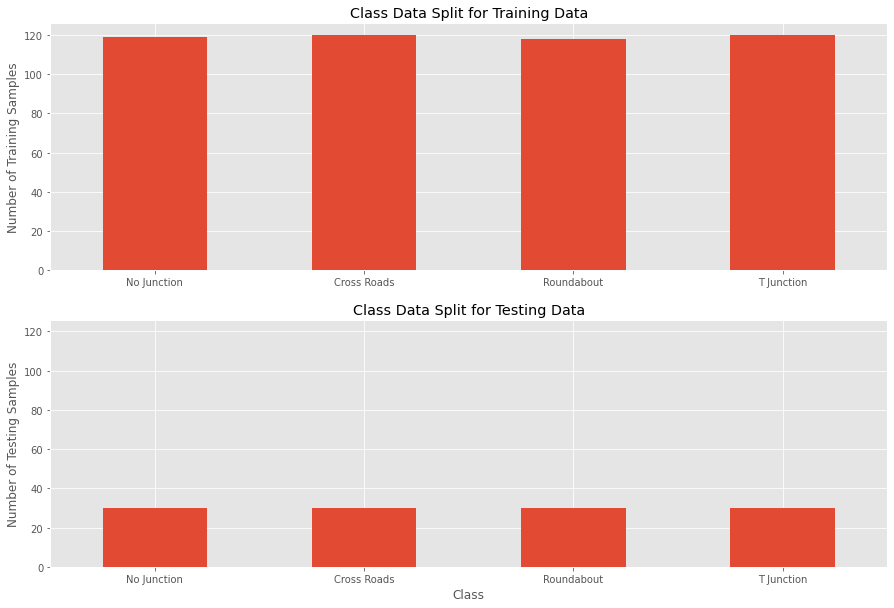

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

labelList = []
for key in labels_fit_4class:
  labelList.append(labels_fit_4class[key])
print(labelList)

print(len(labelList))

labelList2 = []
for key in labels_eval_4class:
  labelList2.append(labels_eval_4class[key])
print(labelList2)

print(len(labelList2))


df1 = pd.DataFrame({'freq': labelList})

df2 = pd.DataFrame({'freq': labelList2})

width2 = 15
height2 = 10
width_height_2 = (width2, height2)


with plt.style.context('ggplot'):

  f, (ax1, ax2) = plt.subplots(2, 1, sharey = True)
  f.set_figheight(height2)
  f.set_figwidth(width2)

  df1.groupby('freq', as_index=True).size().plot(kind = 'bar', ax = ax1)
  ax1.set_ylabel('Number of Training Samples')
  ax1.set_xlabel('')
  ax1.set_title('Class Data Split for Training Data')
  ax1.set_xticklabels(('No Junction', 'Cross Roads', 'Roundabout', 'T Junction'), rotation='horizontal')


  df2.groupby('freq', as_index=True).size().plot(kind='bar', ax = ax2)
  ax2.set_ylabel('Number of Testing Samples')
  ax2.set_xlabel('Class')
  ax2.set_title('Class Data Split for Testing Data')
  ax2.set_xticklabels(('No Junction', 'Cross Roads', 'Roundabout', 'T Junction'), rotation='horizontal')

  plt.savefig(str("/content/gdrive/My Drive/Junction Classify/Plots/4classSplit.png"))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization, Embedding, AveragePooling3D, ConvLSTM2D
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt


# Parameters
params = {'dim': (5, 128, 128),
      'batch_size': 5,
      'n_classes': 4,
      'n_channels': 3,
      'shuffle': True}

# Generators
training_generator_4class = DataGenerator(partition_fit_4class['train'], labels_fit_4class, **params)
validation_generator_4class = DataGenerator(partition_fit_4class['validation'], labels_fit_4class, **params)
evaluation_generator_4class = EvalDataGenerator(partition_eval_4class['evaluate'], labels_eval_4class, **params)

# for i in evaluation_generator_4class.__getitem__(0)[0]:
#     for j in range(1, len(i)+1):
#       plt.subplot(1,5,j)
#       plt.imshow(i[j-1])
#       plt.show()

# print(training_generator_4class.__getitem__(1))

In [ ]:
input_shape = (5, 128, 128, 3)
num_classes = 4
model_4class = Sequential()
model_4class.add(Conv3D(4, kernel_size=(2, 3, 3), activation='relu', input_shape=input_shape)) # input shape only here
model_4class.add(MaxPooling3D(pool_size=(1, 2, 2)))
model_4class.add(BatchNormalization())
model_4class.add(Dropout(0.5)) # dropout = 0.25 is OK to start with
model_4class.add(Conv3D(8, kernel_size=(1, 3, 3), activation='relu')) # kernel_size = (1, 3, 3)
model_4class.add(MaxPooling3D(pool_size=(1, 2, 2))) # subsamples in x and y which will reduce parameters considerably at each layer
model_4class.add(BatchNormalization())
model_4class.add(Dropout(0.5))
model_4class.add(Flatten())
model_4class.add(Dense(128, activation='relu')) # start with a small hidden layer
model_4class.add(Dense(num_classes, activation='softmax'))

model_4class.summary() # check the numbers of parameters at each layers

my_lr = 1e-4

model_4class.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.categorical_accuracy])


# Train model on dataset
model_4class.fit_generator(generator=training_generator_4class,
                    validation_data=validation_generator_4class,
                    use_multiprocessing=False,
                    workers=6,
                    epochs = 100)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_10 (Conv3D)           (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 4, 63, 63, 4)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 63, 63, 4)      16        
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 4, 30, 30, 8)      0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 4, 30, 30, 8)     

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


crossEnt, acc_long = model_4class.evaluate_generator(generator=evaluation_generator_4class)

acc = round(acc_long, 2)

print(crossEnt)
print(acc)

y_pred = np.argmax(model_4class.predict(x_eval_4class), axis=-1)
print(y_pred)
print(classification_report(y_eval_4class, y_pred))

2.859982490539551
0.4
[2 2 2 2 2 1 2 2 2 2 2 1 1 1 1 3 3 3 1 3 3 1 3 3 3 2 1 1 1 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 2 3 3 3 2 2 2 3 1 1 1 1 1 1 1 2 3 3 2 2 2 2 3 1 2 1
 1 1 1 1 1 1 2 2 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.56      0.97      0.71        30
           2       0.48      0.40      0.44        30
           3       0.16      0.23      0.19        30

    accuracy                           0.40       120
   macro avg       0.30      0.40      0.33       120
weighted avg       0.30      0.40      0.33       120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
numClass = '4'
date = '24_8'
ver = '05'

dir = str("/content/gdrive/My Drive/Junction Classify/Models/"+ numClass +"class/"+ numClass +"class_"+ date +"_(" + ver + ")_"+ str(acc))

# serialize model to JSON
model_4class_json = model_4class.to_json()
with open(str(dir + '.json'), "w") as json_file:
    json_file.write(model_4class_json)
# serialize weights to HDF5
model_4class.save_weights(str(dir + ".h5"))
print("Saved model to disk")

Saved model to disk


In [ ]:
from sklearn.metrics import classification_report
dir = "/content/gdrive/My Drive/Junction Classify/Models/4class/4class_24_8_(03)_0.68"

my_lr = 1e-4

# load json and create model
json_file = open(str(dir + '.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(str(dir + ".h5"))
print("Loaded model from disk")

loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.categorical_accuracy])
y_pred = np.argmax(loaded_model.predict(x_eval_4class), axis=-1)
print(classification_report(y_eval_4class, y_pred))

Loaded model from disk
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.74      0.77      0.75        30
           2       0.53      0.67      0.59        30
           3       0.80      0.40      0.53        30

    accuracy                           0.68       120
   macro avg       0.70      0.67      0.67       120
weighted avg       0.70      0.68      0.67       120



In [ ]:
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_11 (Conv3D)           (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 4, 63, 63, 4)      0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 4, 63, 63, 4)      16        
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 4, 30, 30, 8)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 4, 30, 30, 8)     

In [ ]:
crossEnt, acc_long= loaded_model.evaluate_generator(generator=evaluation_generator_4class)

acc = round(acc_long, 2)

print(crossEnt)
print(acc)

2.044896364212036
0.68


**7 Class**



---



---



In [ ]:
import numpy as np
from keras.models import Sequential
import json
from keras.utils import to_categorical

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

with open('/content/gdrive/My Drive/Junction Classify/junc data7/labels_fit_7class.json', 'r') as fp:
    labels_fit_7class = json.load(fp)
with open('/content/gdrive/My Drive/Junction Classify/junc data7/partition_fit_7class.json', 'r') as fp:
    partition_fit_7class = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data7/labels_eval_7class.json', 'r') as fp:
    labels_eval_7class = json.load(fp)
with open('/content/gdrive/My Drive/Junction Classify/junc data7/partition_eval_7class.json', 'r') as fp:
    partition_eval_7class = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data7/IDInfo_fit_7class.json', 'r') as fp:
    IDInfo_fit_7class = json.load(fp)

with open('/content/gdrive/My Drive/Junction Classify/junc data7/IDInfo_eval_7class.json', 'r') as fp:
    IDInfo_eval_7class = json.load(fp)

from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display
%matplotlib inline


y_eval_7class = []

x_eval_7class = np.empty((len(labels_eval_7class), 5, 128, 128, 3))
count = 0
for key in labels_eval_7class:
  y_eval_7class.append(labels_eval_7class[key])
  x_eval_7class[count,] = np.load('/content/gdrive/My Drive/Junction Classify/junc data7/eval/' + key + '.npy')
  count += 1

Mounted at /content/gdrive


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 

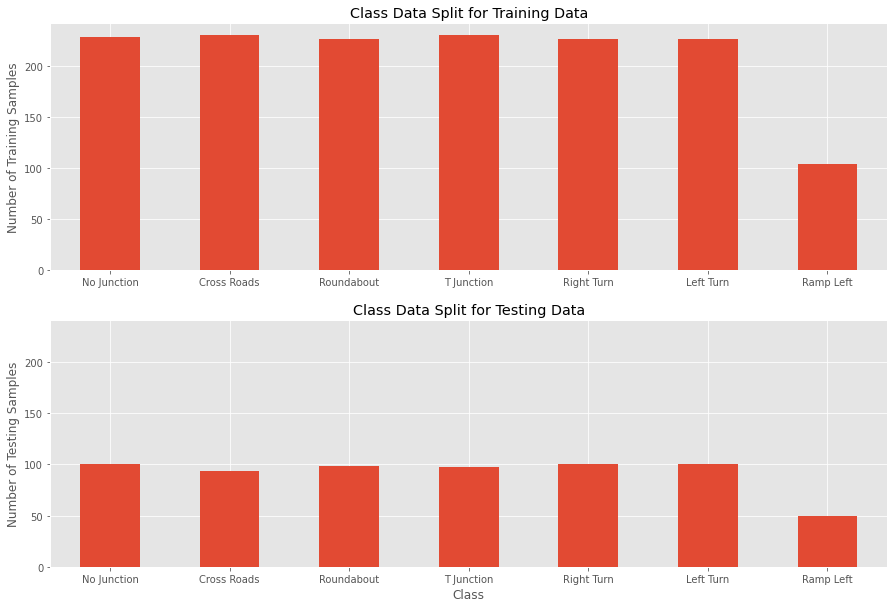

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

labelList = []
for key in labels_fit_7class:
  labelList.append(labels_fit_7class[key])
print(labelList)

print(len(labelList))

labelList2 = []
for key in labels_eval_7class:
  labelList2.append(labels_eval_7class[key])
print(labelList2)

print(len(labelList2))


df1 = pd.DataFrame({'freq': labelList})

df2 = pd.DataFrame({'freq': labelList2})

width2 = 15
height2 = 10
width_height_2 = (width2, height2)


with plt.style.context('ggplot'):

  f, (ax1, ax2) = plt.subplots(2, 1, sharey = True)
  f.set_figheight(height2)
  f.set_figwidth(width2)

  df1.groupby('freq', as_index=True).size().plot(kind = 'bar', ax = ax1)
  ax1.set_ylabel('Number of Training Samples')
  ax1.set_xlabel('')
  ax1.set_title('Class Data Split for Training Data')
  ax1.set_xticklabels(('No Junction', 'Cross Roads', 'Roundabout', 'T Junction', 'Right Turn', 'Left Turn', 'Ramp Left'), rotation='horizontal')


  df2.groupby('freq', as_index=True).size().plot(kind='bar', ax = ax2)
  ax2.set_ylabel('Number of Testing Samples')
  ax2.set_xlabel('Class')
  ax2.set_title('Class Data Split for Testing Data')
  ax2.set_xticklabels(('No Junction', 'Cross Roads', 'Roundabout', 'T Junction', 'Right Turn', 'Left Turn', 'Ramp Left'), rotation='horizontal') 
  plt.savefig(str("/content/gdrive/My Drive/Junction Classify/Plots/7classSplit.png"))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization, Embedding, AveragePooling3D, ConvLSTM2D
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

# Parameters
params = {'dim': (5, 128, 128),
      'batch_size': 5,
      'n_classes': 7,
      'n_channels': 3,
      'shuffle': True}

# Generators
training_generator_7class = DataGenerator(partition_fit_7class['train'], labels_fit_7class, **params)
validation_generator_7class = DataGenerator(partition_fit_7class['validation'], labels_fit_7class, **params)
evaluation_generator_7class = EvalDataGenerator(partition_eval_7class['evaluate'], labels_eval_7class, **params)

# for i in validation_generator_7class.__getitem__(0)[0]:
#     for j in range(1, len(i)+1):
#       plt.subplot(1,5,j)
#       plt.imshow(i[j-1])
#       plt.show()

# print(training_generator_7class.__getitem__(1))

In [ ]:
input_shape = (5, 128, 128, 3)
num_classes = 7
model_7class = Sequential()
model_7class.add(Conv3D(4, kernel_size=(2, 3, 3), activation='relu', input_shape=input_shape)) # input shape only here
model_7class.add(MaxPooling3D(pool_size=(1, 2, 2)))
model_7class.add(Dropout(0.5)) # dropout = 0.25 is OK to start with
model_7class.add(Conv3D(8, kernel_size=(1, 3, 3), activation='relu')) # kernel_size = (1, 3, 3)
model_7class.add(MaxPooling3D(pool_size=(1, 2, 2))) # subsamples in x and y which will reduce parameters considerably at each layer
model_7class.add(Dropout(0.5))
model_7class.add(Flatten())
model_7class.add(Dense(128, activation='relu')) # start with a small hidden layer
model_7class.add(Dense(num_classes, activation='softmax'))

model_7class.summary() # check the numbers of parameters at each layers

my_lr = 1e-4

model_7class.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.categorical_accuracy])


# Train model on dataset
history = model_7class.fit_generator(generator=training_generator_7class,
                    validation_data=validation_generator_7class,
                    use_multiprocessing=False,
                    workers=6,
                    epochs = 50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 4, 63, 63, 4)      0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 30, 30, 8)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 30, 30, 8)      0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

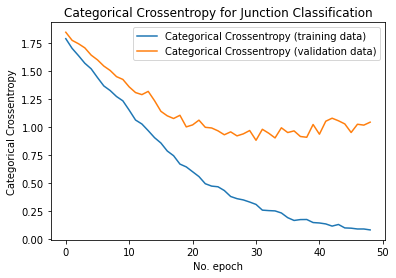

In [ ]:
# Plot history: Mean Squared Error
plt.plot(history.history['loss'][1:], label='Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'][1:], label='Categorical Crossentropy (validation data)')
plt.title("Categorical Crossentropy for Junction Classification")
plt.ylabel('Categorical Crossentropy')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.savefig(str("/content/gdrive/My Drive/Junction Classify/Plots/7classHistory.png"))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


crossEnt, acc_long= model_7class.evaluate_generator(generator=evaluation_generator_7class)

acc = round(acc_long, 2)

print(crossEnt)
print(acc)

# print(x_eval)

y_pred = np.argmax(model_7class.predict(x_eval_7class), axis=-1)
# print(y_pred)
print(classification_report(y_eval_7class, y_pred))

In [ ]:
numClass = '7'
date = '25_8'
ver = '04'

dir = str("/content/gdrive/My Drive/Junction Classify/Models/"+ numClass +"class/"+ numClass +"class_"+ date +"_(" + ver + ")_"+ str(acc))

# serialize model to JSON
model_7class_json = model_7class.to_json()
with open(str(dir + '.json'), "w") as json_file:
    json_file.write(model_7class_json)
# serialize weights to HDF5
model_7class.save_weights(str(dir + ".h5"))
print("Saved model to disk")

Saved model to disk


In [ ]:
dir = str("/content/gdrive/My Drive/Junction Classify/Models/7class/7class_25_8_(03)_0.5")


# load json and create model
json_file = open(str(dir + '.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(str(dir + ".h5"))
print("Loaded model from disk")

loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.categorical_accuracy])
y_pred = np.argmax(loaded_model.predict(x_eval_7class), axis=-1)
print(classification_report(y_eval_7class, y_pred))

Loaded model from disk
              precision    recall  f1-score   support

           0       0.44      0.36      0.40       100
           1       0.52      0.52      0.52        94
           2       0.51      0.55      0.53        99
           3       0.52      0.62      0.57        98
           4       0.45      0.49      0.47       100
           5       0.39      0.35      0.37       100
           6       0.91      0.84      0.87        50

    accuracy                           0.51       641
   macro avg       0.54      0.53      0.53       641
weighted avg       0.51      0.51      0.51       641



In [ ]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_7 (Conv3D)            (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 4, 63, 63, 4)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 4, 30, 30, 8)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 30, 30, 8)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)            